In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Load the file
netflix_data = pd.read_csv('netflix_titles.csv')

In [12]:

# Print first 5 rows of data
print(netflix_data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [14]:
# Print last 5 rows of data
print(netflix_data.tail())


     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [16]:
# Cleaning the data for missing values, null values etc.
print("Missing values:", netflix_data.isnull().sum())
netflix_data.fillna({'maturity': 'TV-MA', 'country': 'United States'}, inplace=True)

Missing values: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [18]:
# Print info on the dataset
print(netflix_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [20]:
# Get some description of the data
print(netflix_data['release_year'].describe())


count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


In [22]:
# Columns in the dataset
print(netflix_data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [118]:
# Shape of The data frame
print("\t\t ROWS AND COLUMNS")
print(netflix_data.shape)


		 ROWS AND COLUMNS
(8807, 13)


In [26]:
# How many years of Data (1966-2021) (release_year)
print(netflix_data['release_year'].nunique())


74


In [28]:

# MOVIES vs TV SHOWS (type)
print(netflix_data['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [30]:
# Rename the Column "listed_in" to "genre"
netflix_data.rename(columns={'listed_in': 'genre'}, inplace=True)


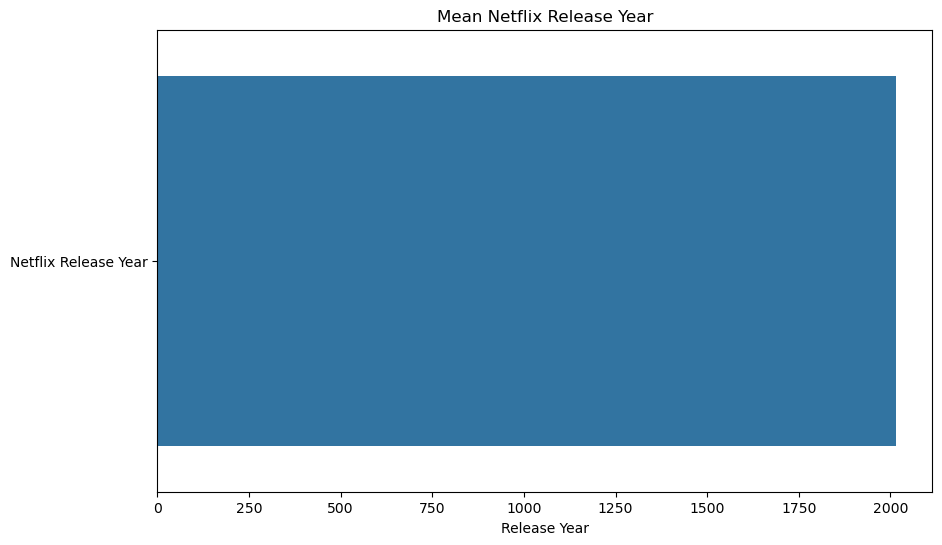

In [94]:

# Calculate the mean release year
mean_release_year = netflix_data['release_year'].mean()

# Create a barh plot
plt.figure(figsize=(10,6))  # Adjusted figure size
sns.barplot(x=[mean_release_year], y=['Netflix Release Year']) 
plt.title('Mean Netflix Release Year')
plt.xlabel('Release Year')  # Added label for clarity
plt.ylabel('')  # Removed label since there's only one category
plt.show()

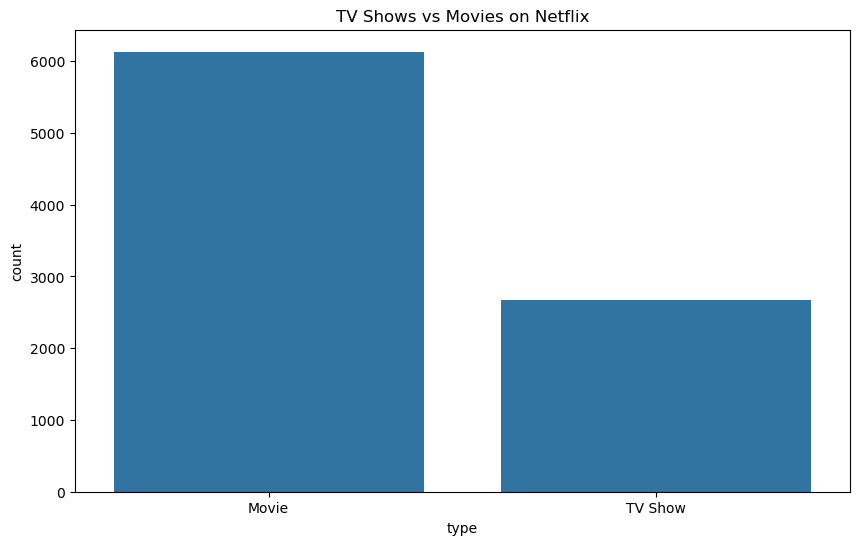

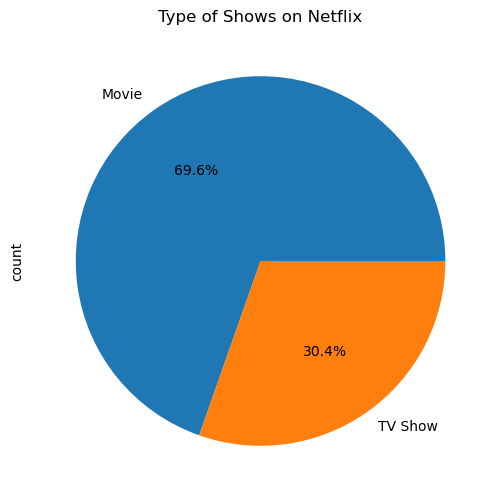

In [44]:
# Visualization 3: Type of shows percentage on Netflix using pie chart
plt.figure(figsize=(10,6))
netflix_data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Type of Shows on Netflix')
plt.show()

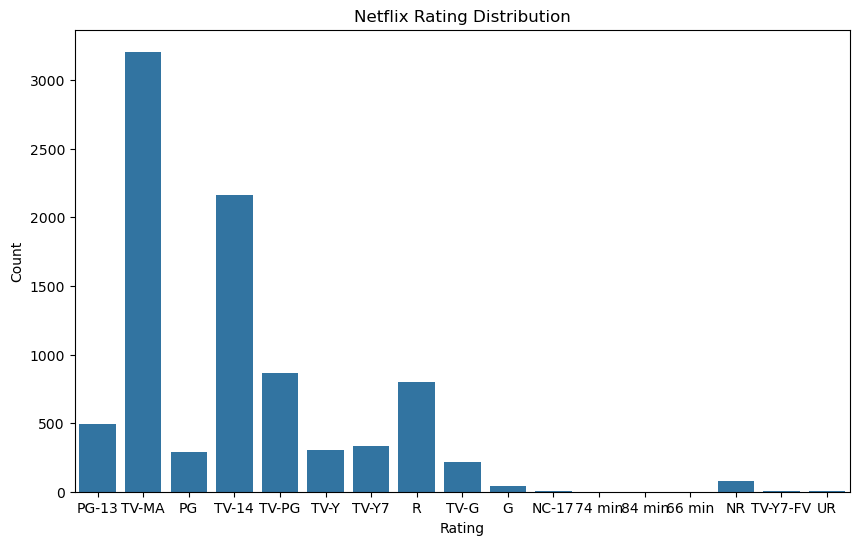

In [112]:
# Visualization 4: Netflix Rating Distribution

# Count plot for Netflix rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix_data)
plt.title('Netflix Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



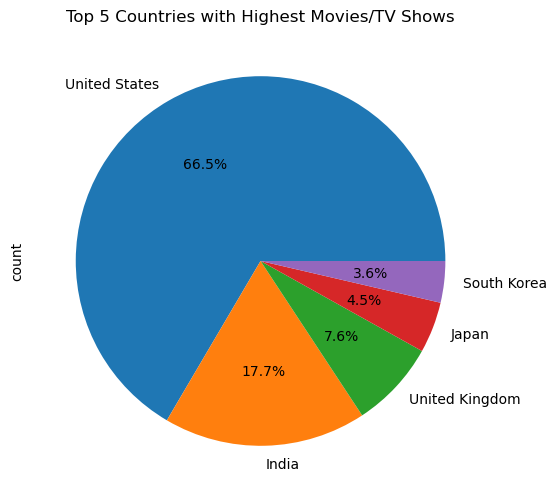

In [66]:
# Visualization 5: Top 5 countries with Highest Movies/TV Shows
top_countries = netflix_data['country'].value_counts().nlargest(5)
plt.figure(figsize=(10,6))
top_countries.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Countries with Highest Movies/TV Shows')
plt.show()

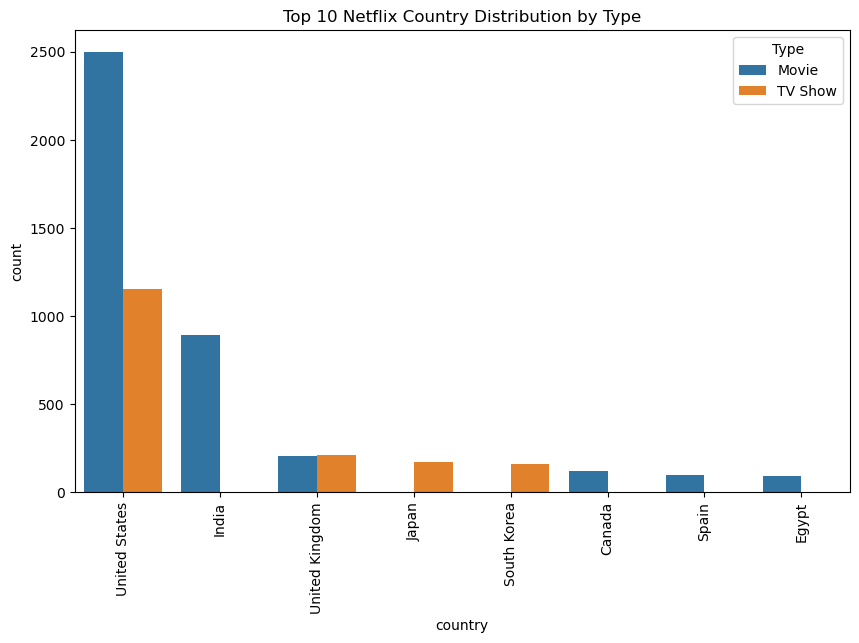

In [98]:
# Visualization 6: Top 5 Netflix country distribution separated by type of release
top_countries_type = netflix_data.groupby(['country', 'type']).size().nlargest(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', hue='type', data=top_countries_type)
plt.title('Top 10 Netflix Country Distribution by Type')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.show()

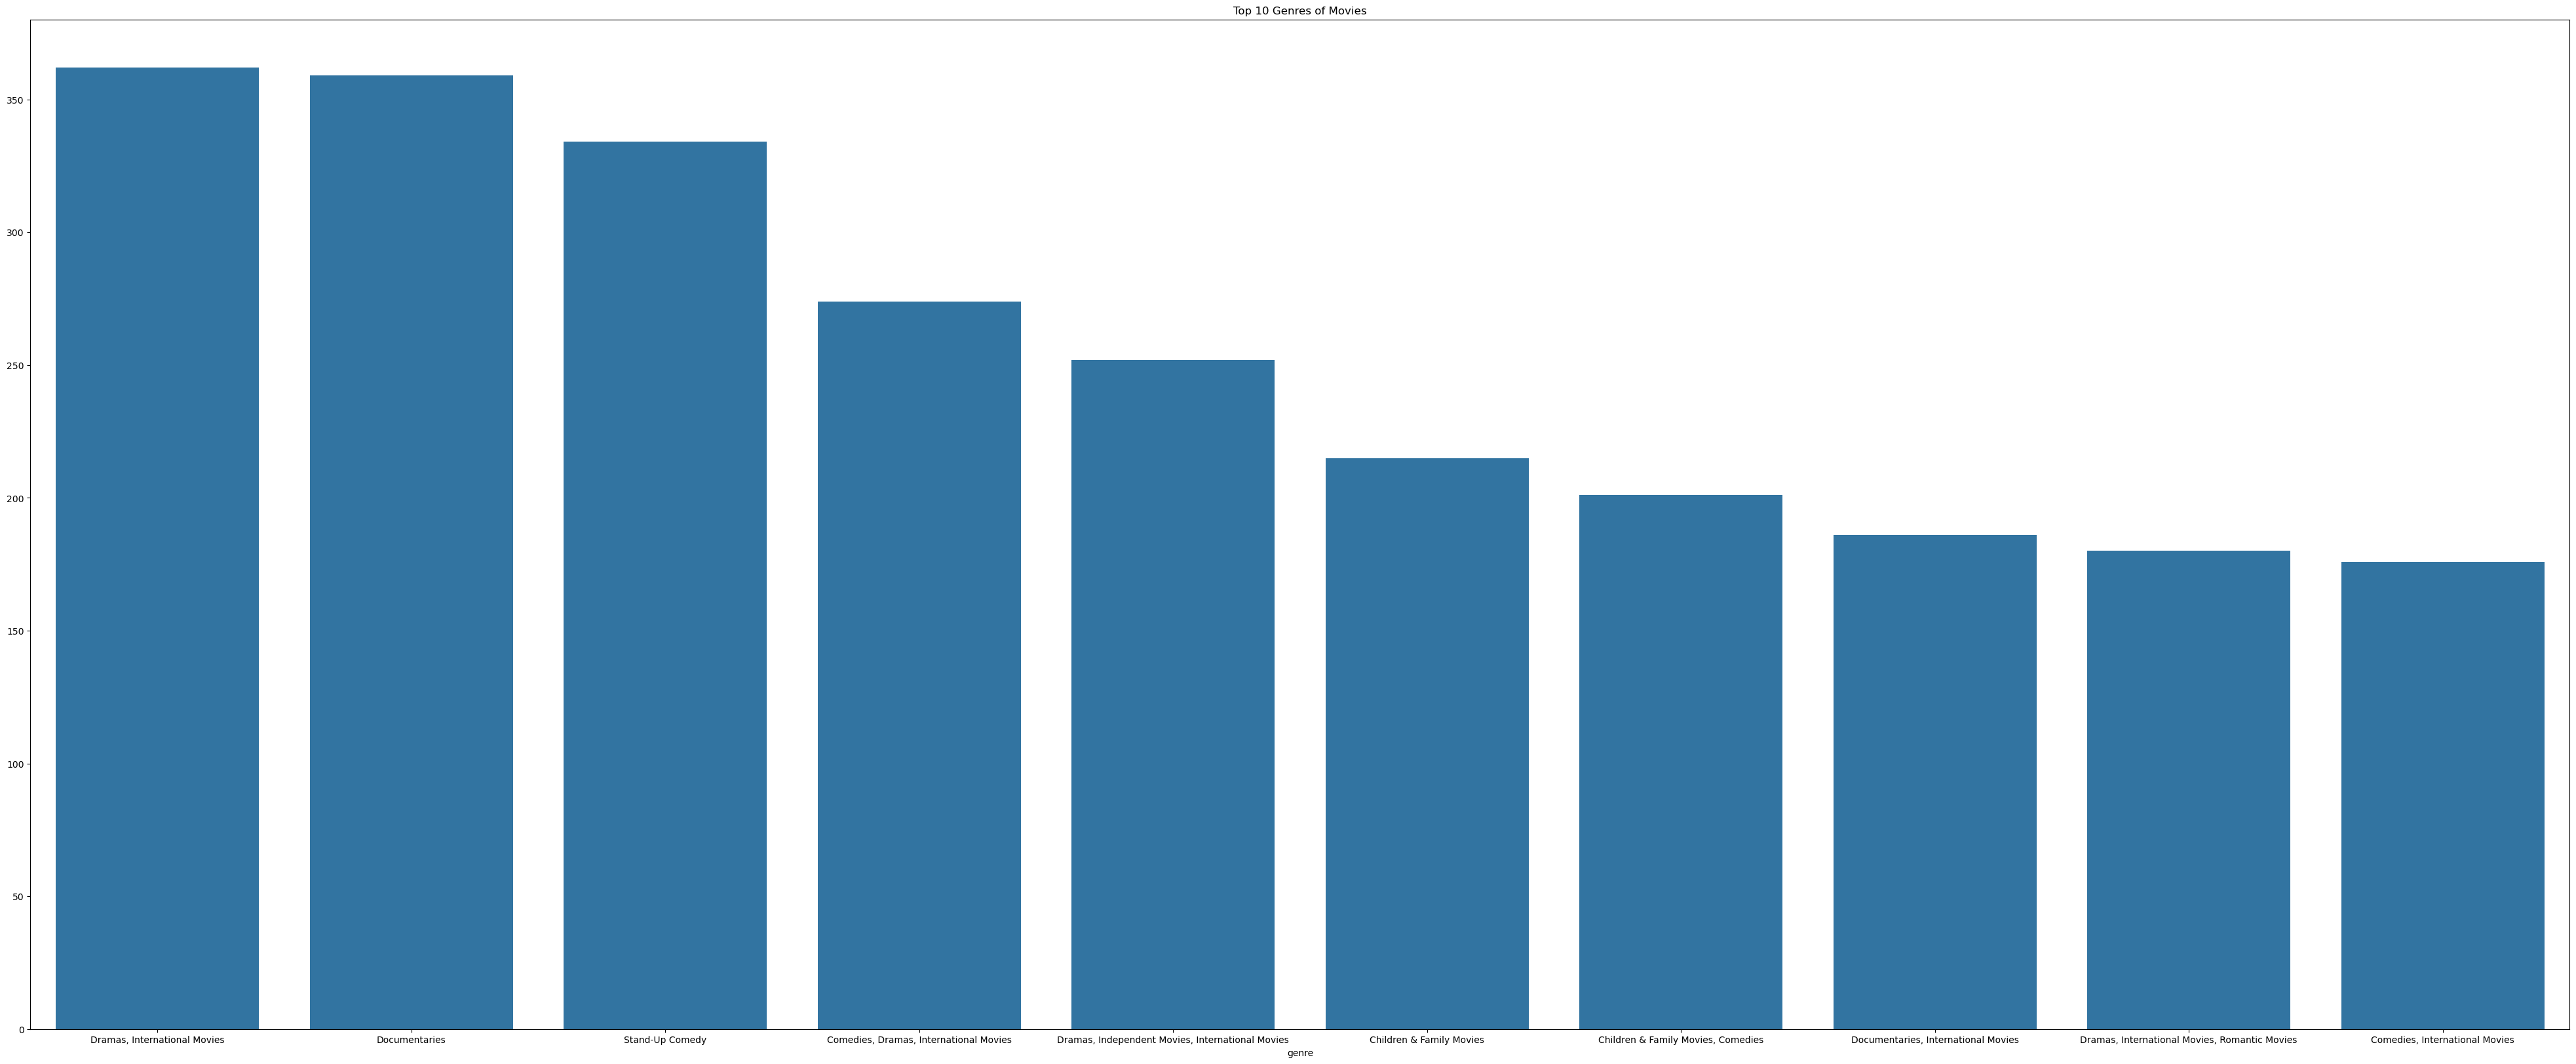

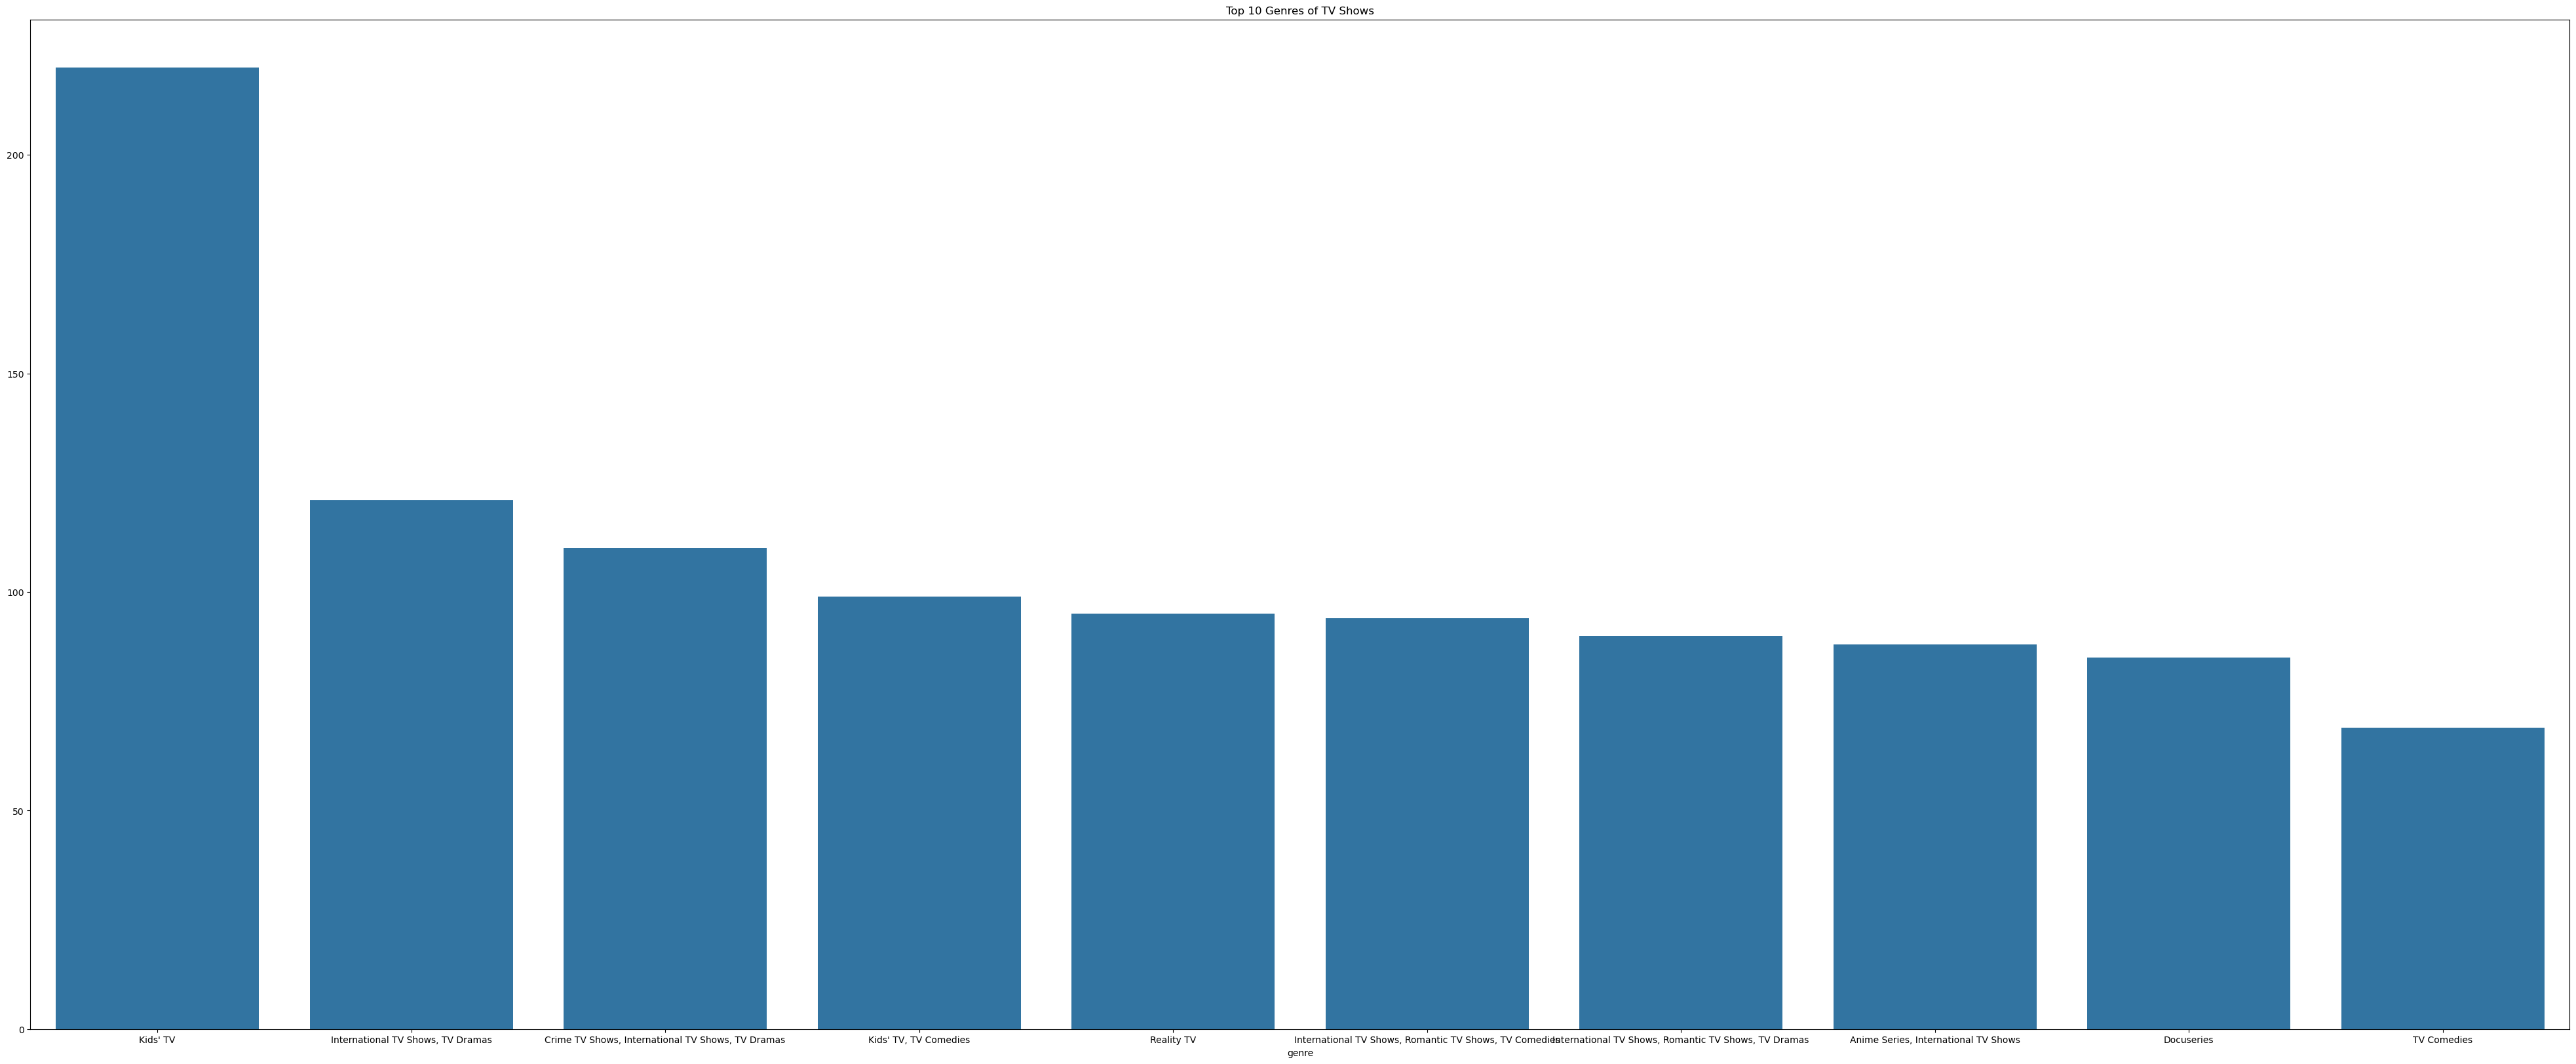

In [86]:

# Visualization 7: Top 10 genres of movies and TV shows
top_genres_movies = netflix_data[netflix_data['type']=='Movie']['genre'].value_counts().nlargest(10)
top_genres_tv = netflix_data[netflix_data['type']=='TV Show']['genre'].value_counts().nlargest(10)
plt.figure(figsize=(50,20))
sns.barplot(x=top_genres_movies.index, y=top_genres_movies.values)
plt.title('Top 10 Genres of Movies')
plt.show()
plt.figure(figsize=(50,20))
sns.barplot(x=top_genres_tv.index, y=top_genres_tv.values)
plt.title('Top 10 Genres of TV Shows')
plt.show()

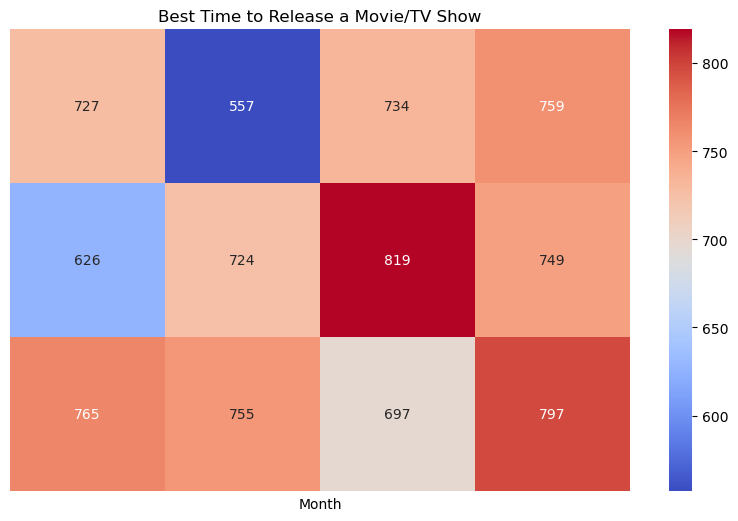

In [116]:
# Extract release month from 'date_added'
netflix_data['release_month'] = pd.to_datetime(netflix_data['date_added'], errors='coerce').dt.month

# Create a heatmap
plt.figure(figsize=(10, 6))
month_counts = netflix_data['release_month'].value_counts().sort_index()
sns.heatmap(month_counts.values.reshape(3, 4), annot=True, fmt='d', cmap='coolwarm')
plt.title('Best Time to Release a Movie/TV Show')
plt.xlabel('Month')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()